In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np


[0.40148081 0.51610268 0.25155658 0.10650329 0.78562925 0.98888339
 0.73224078 0.6625148  0.46933344 0.05792244 0.26733261 0.4461861
 0.46255516 0.32713539 0.48891514 0.93106448 0.33207787 0.60062927
 0.74498127 0.04100574 0.64583947 0.33505562 0.23661511 0.13546477
 0.5518549  0.85288196 0.09929053 0.84170848 0.86168981 0.39383485]


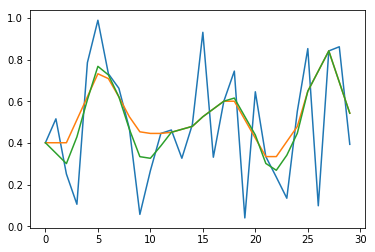

In [2]:
def smooth3s(x):
    if len(x) <= 2:
        return x
    y = np.empty_like(x)
    y[0], y[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y[j] = np.median(x[j-1:j+2])
    z = np.empty_like(y)
    z[0], z[-1] = (2*y[0]+y[1])/3, (2*y[-1]+y[-2])/3
    z[1:-1] = (y[1:-1] + y[:-2] + y[2:])/3
    return z

def smooth353(x):
    if len(x) <= 2:
        return x

    y3 = np.empty_like(x)
    y3[0], y3[-1] = x[0], x[-1]
    for j in xrange(1,len(x)-1):
        y3[j] = np.median(x[j-1:j+2])
        
    if len(y3) >= 5:
        y5 = np.empty_like(y3)
        y5[:2] = y3[:2]
        y5[-2:] = y3[-2:]
        for j in xrange(2,len(y3)-2):
            y5[j] = np.median(y3[j-2:j+3])
        y3[0], y3[-1] = y5[0], y5[-1]
        for j in xrange(1,len(x)-1):
            y3[j] = np.median(y5[j-1:j+2])

    return y3

def smooth353s(x):
    if len(x) < 3:
        return x
    
    x353 = smooth353(x)
    s = np.empty_like(x353)
    s[0], s[-1] = (2*x353[0]+x353[1])/3, (2*x353[-1]+x353[-2])/3
    s[1:-1] = (x353[1:-1] + x353[:-2] + x353[2:])/3
    
    return s
    

x= np.random.random((30,))
print x
plt.plot(x)
plt.plot(smooth353s(x))
plt.plot(smooth3s(x))

In [299]:
def plot(filename = "run_log.csv"):
    df=pd.read_csv(filename)
    x=df["episodes"].values[:200]
    y=df["reward_per_episode"].values[:200]
    loss=df["loss_ma"].values[:200]

    plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.plot(x,y, ls="None", marker=".")
    plt.plot(x,smooth353s(y))
    plt.ylim(-3.0, 5.0)
    plt.grid()

    plt.subplot(122)
    plt.plot(x, loss, ls="None", marker=".")
    plt.plot(x, smooth353s(loss))
    plt.ylim(0.0, 0.2)
    plt.grid()
    

Base:

* Gamma: 0.99
* Hard update
* Soft update: 0.01
* Hit reward: 5.0
* Out of area reward: -1.0
* Miss reward: -0.01
* V-selectivity: False

Kind: naive

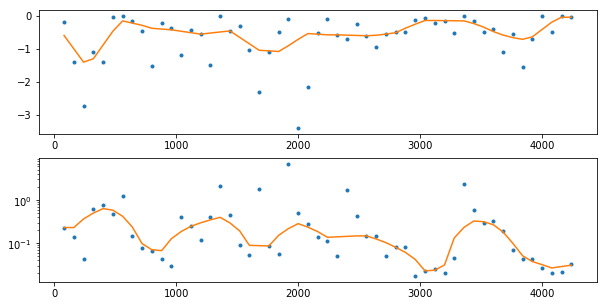

In [39]:
plot()

Kind: diff
* Differential: Boltzman T=0.01

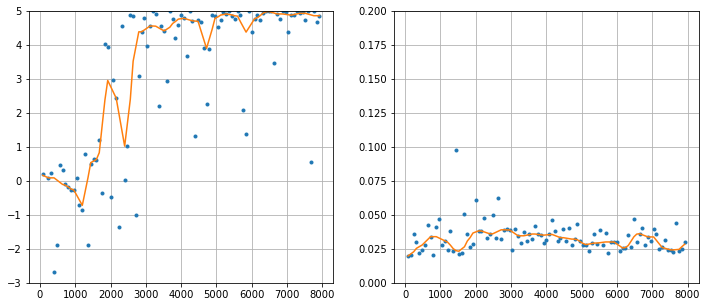

In [409]:
plot("logs1/diff.csv")

Kind: DQN

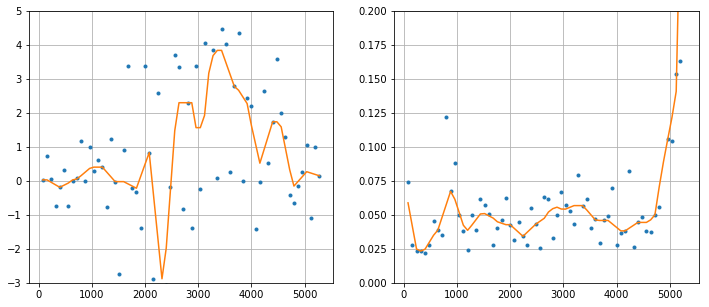

In [410]:
plot("logs1/dqn.csv")

Kind: DoubleDQN

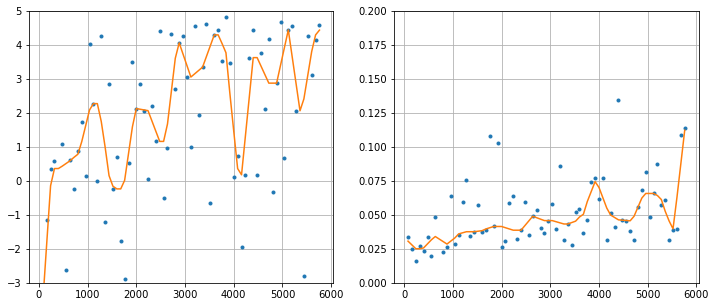

In [412]:
plot("logs1/double.csv")